# Group Project: Forest Cover Type Prediction

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [195]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [196]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

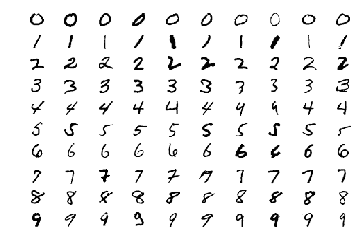

In [197]:
def P1(num_examples=10):

### STUDENT START ###
    # Create 10*10 subplot array
    fig, axes = plt.subplots(num_examples,num_examples)
    # Setup 10*10 with 2 for loops; outer sequenced by x then inner sequenced by y
    for x in range(0, num_examples):
        # Initialize/reset integer index for iterating through test data
        i = 0
        for y in range(0, num_examples):
            # Tracker initialize/reset for when outer loop sequence/indexed digit found
            digit_found = 0
            # While condition for test data iteration
            while digit_found == 0:
                # Looking for when test data label matches outer loop index (i.e. 0-9)
                if int(mini_train_labels[i]) ==  x:
                    # Convert test data vector to 2 dimensional matrix for rendering
                    two_d = (np.reshape(mini_train_data[i], (28, 28)) * 255).astype(np.uint8)
                    # Set approprirate subplot with black and white rendering
                    axes[x,y].imshow(two_d, cmap='Greys', interpolation='nearest')
                    axes[x,y].axis('off')
                    # Indicate the digit found to reset while iteration
                    digit_found += 1
                # Sequence the train data index
                i += 1
    # Show the plot and subplots
    plt.show()
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [198]:
def P2(k_values):

### STUDENT START ###
    # Iterate through list and create K-Nearest-Neighbors model fit with mini training set.
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        # Apply the model to the dev set.
        predicted_labels = model.predict(dev_data)
        # Calculate and print the accuracy of the model based on number wrong / number right
        wrong_prediction = (predicted_labels != dev_labels)
        right_prediction = (predicted_labels == dev_labels)
        print('k=', k, 'model accuracy:', round(1-(np.sum(wrong_prediction)/np.sum(right_prediction)),3)*100, '%', \
             '(', np.sum(wrong_prediction), 'wrong and ', np.sum(right_prediction), 'right).')
        # For k=1, show precision, recall, and F1 for each label.
        if k == 1:
            print('for k=1',classification_report(dev_labels, predicted_labels))  
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k= 1 model accuracy: 87.4 % ( 112 wrong and  888 right).
for k=1              precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k= 3 model accuracy: 86.1 % ( 122 wrong and  878 right).
k= 5 model accuracy: 84.9 % ( 131 wrong and  869 right).
k= 7 model accuracy: 84.4 % ( 135 wrong and  865 right).
k= 9 model accuracy: 84.1 % ( 137 wrong and  863 right).


ANSWER:  The most difficult digit is the 9 because the F1-Score (harmonic mean of precision and recall) is the lowest and also since recall (percentage of relevant instances that have been retrieved over the total amount of relevant instances) is also the lowest (although tied with the 4 digit). This seems intuitive as well since a 9 can be similar to, and mistaken for, several other numbers. The 3 digit is a close second in terms of difficulty and does have the lowest precision (percentage of relevant instances among the retrieved instances).

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [199]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for x in train_sizes:
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:x], train_labels[:x])
        # Apply the model to the dev set.
        start_time=time.time()
        predicted_labels = model.predict(dev_data)
        end_time=time.time()
        print('Training time in seconds for training size ', x, ': ',round(end_time-start_time,4))
        # Calculate and print the accuracy of the model based on number wrong / number right
        wrong_prediction = (predicted_labels != dev_labels)
        right_prediction = (predicted_labels == dev_labels)
        print('Training size', x, 'model accuracy:', round(1-(np.sum(wrong_prediction)/np.sum(right_prediction)),3)*100, '%', \
             '(', np.sum(wrong_prediction), 'wrong and ', np.sum(right_prediction), 'right).')
        accuracies.append((round(1-(np.sum(wrong_prediction)/np.sum(right_prediction)),5)))
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training time in seconds for training size  100 :  0.1168
Training size 100 model accuracy: 61.1 % ( 280 wrong and  720 right).
Training time in seconds for training size  200 :  0.2211
Training size 200 model accuracy: 72.8 % ( 214 wrong and  786 right).
Training time in seconds for training size  400 :  0.4455
Training size 400 model accuracy: 81.1 % ( 159 wrong and  841 right).
Training time in seconds for training size  800 :  0.911
Training size 800 model accuracy: 86.9 % ( 116 wrong and  884 right).
Training time in seconds for training size  1600 :  1.8606
Training size 1600 model accuracy: 89.1 % ( 98 wrong and  902 right).
Training time in seconds for training size  3200 :  3.4638
Training size 3200 model accuracy: 92.0 % ( 74 wrong and  926 right).
Training time in seconds for training size  6400 :  6.9084
Training size 6400 model accuracy: 93.3 % ( 63 wrong and  937 right).
Training time in seconds for training size  12800 :  13.8071
Training size 12800 model accuracy: 95.7 

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Estimated function: y = 0.80524 + 0.00001x
When train size = 60000, accuracy = 133.03%


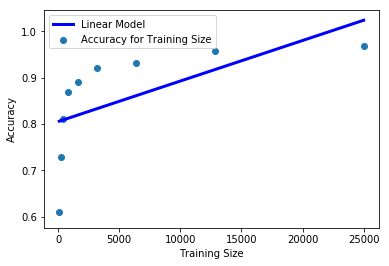

Estimated function: y = 0.42477 + 0.05825x
When train size = log(60000), accuracy = 106.56%


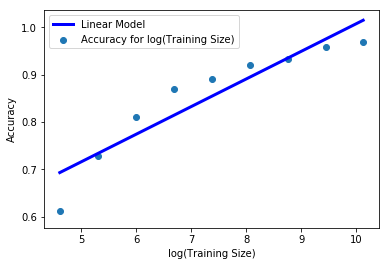

In [200]:
def P4():

### STUDENT START ###
    # Create scatter plot to illustrate training and accuracy relationship
    plt.scatter(train_sizes, accuracies, label="Accuracy for Training Size")
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    # Create numpy arrays for X, Y
    X = np.array(train_sizes)
    Y = np.array(accuracies)
    # Create Linear Regression model and fit linear model, print results
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X.reshape(-1,1), Y.reshape(-1,1))
    print ('Estimated function: y = %.5f + %.5fx' %(lr.intercept_, lr.coef_))
    # Predict accuracy when training size is 60000
    print ('When train size = 60000, accuracy = %.2f%%' %((lr.intercept_+(60000*lr.coef_))*100))
    # Plot and show model and legend
    accuracy_y_pred = lr.predict(X.reshape(-1,1))
    plt.plot(X, accuracy_y_pred, color='blue', linewidth=3, label="Linear Model")
    plt.legend(loc='best')
    plt.show()
    # Repeat above by apply logarithmic transform to training sizes
    #
    # Create numpy array for log X
    log_X = np.log(np.array(train_sizes))
    # Create scatter plot to illustrate accuracy and log(training) relationship
    plt.scatter(log_X, accuracies, label="Accuracy for log(Training Size)")
    plt.xlabel('log(Training Size)')
    plt.ylabel('Accuracy')
    # Create Linear Regression model and fit linear model, print results
    lr = LinearRegression(fit_intercept=True)
    lr.fit(log_X.reshape(-1,1), Y.reshape(-1,1))
    print ('Estimated function: y = %.5f + %.5fx' %(lr.intercept_, lr.coef_))
    # Predict accuracy when training size is 60000
    print ('When train size = log(60000), accuracy = %.2f%%' %((lr.intercept_+(np.log(60000)*lr.coef_))*100))
    # Plot and show model and legend
    accuracy_y_pred = lr.predict(log_X.reshape(-1,1))
    plt.plot(log_X, accuracy_y_pred, color='blue', linewidth=3, label="Linear Model")
    plt.legend(loc='best')
    plt.show()
### STUDENT END ###

P4()

ANSWER:  When training size = 60000, the model predicts accuracy = 133.03%. Linear Regression is problematic in this example becuase, as you can see in the first plot, the data is curvilinear. Applying a logistic transform to the training sizes produces a production that is much more reasonable.  At a training size of log(60000), the model predicts accuracy = 106.56%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix for 0 to 9 Classification
  (y axis =True, x axis=Predicted)
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

While 3 has relatively decent recall on dev data, the confusion matrix shows lower precision and False Postivies:


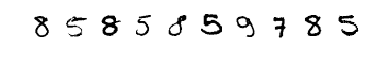


While 2 has near perfect precision on dev data, the confusion matrix shows much lower recall and False Negatives (other digits predicted as 2s):


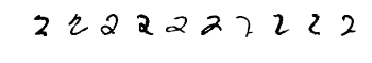

In [201]:
def P5():

### STUDENT START ###
    # Create 1-Nearest-Neighbors model fit with training set.
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    # Apply the model to the dev set.
    predicted_labels = model.predict(dev_data)
    #print(classification_report(dev_labels, predicted_labels))
    # Generate and print a confusion matrix for dev data prediction.
    print('Confusion Matrix for 0 to 9 Classification')
    print('  (y axis =True, x axis=Predicted)')
    print(confusion_matrix(dev_labels,predicted_labels))
    # Select and print mistake examples of FP and FN digits
    print('\nWhile 3 has relatively decent recall on dev data, the confusion matrix shows lower precision and False Postivies:')
    FP = dev_data[np.array(predicted_labels == 3.0) & np.array(dev_labels != 3.0)]
    fig, axes = plt.subplots(1,10)
    for i in range(0, 10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(FP[i], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes[i].imshow(two_d, cmap='Greys', interpolation='nearest')
        axes[i].axis('off')
    plt.show()
    print('\nWhile 2 has near perfect precision on dev data, the confusion matrix shows much lower recall and False Negatives (other digits predicted as 2''s):')
    FN = dev_data[np.array(predicted_labels != 2.0) & np.array(dev_labels == 2.0)]
    fig2, axes2 = plt.subplots(1,10)
    for j in range(0, 10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(FN[j], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes2[j].imshow(two_d, cmap='Greys', interpolation='nearest', label='Predicted')
        axes2[j].axis('off')
    plt.show()
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Non blurred examples:


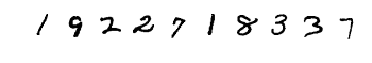

Gaussian blurred examples:


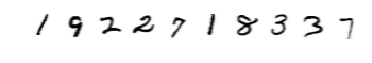

Blurred training data but not the dev data
Confusion Matrix for 0 to 9 Classification
  (y axis =True, x axis=Predicted)
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 104   1   0   0   0   0   0   0   0]
 [  4   3  81   4   0   0   0   4   4   2]
 [  1   0   1  68   0   5   1   2   4   4]
 [  0   0   0   0  91   0   2   0   1  10]
 [  2   0   0   8   1  74   1   2   2   1]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   2   0   2   0   0   0 107   0   1]
 [  0   1   0   1   0   1   0   0  91   2]
 [  1   0   0   2   6   1   0   4   1  91]]
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.94      0.99      0.96       105
        2.0       0.96      0.79      0.87       102
        3.0       0.80      0.79      0.80        86
        4.0       0.92      0.88      0.90       104
        5.0       0.91      0.81      0.86        91
        6.0       0.94      0.96      0.95        98
        7.0       0.90 

In [202]:
def P6():
    
### STUDENT START ###
    # Import scipy Gaussian blur filter
    from scipy.ndimage import gaussian_filter
    
    # Testing Gaussian blur on training data with display
    blur_train_data = np.array(mini_train_data)
    for train_digit in range (0, len(blur_train_data)):
        blur_train_data[train_digit] = gaussian_filter(blur_train_data[train_digit],sigma=1)
    print('Non blurred examples:')
    fig, axes = plt.subplots(1,10)
    for i in range(0,10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(mini_train_data[i], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes[i].imshow(two_d, cmap='Greys', interpolation='nearest', label='Predicted')
        axes[i].axis('off')
    plt.show()
    print('Gaussian blurred examples:')
    fig2, axes2 = plt.subplots(1,10)
    for j in range(0,10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(blur_train_data[j], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes2[j].imshow(two_d, cmap='Greys', interpolation='nearest', label='Predicted')
        axes2[j].axis('off')
    plt.show()
    
    # Preprocess the training data but not the dev data
    # blur training data
    blur_train_data = np.array(mini_train_data)
    for train_digit in range (0, len(blur_train_data)):
        blur_train_data[train_digit] = gaussian_filter(blur_train_data[train_digit],sigma=1)
    # Create 1-Nearest-Neighbors model fit with training set.
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(blur_train_data, mini_train_labels)
    # Apply the model to the dev set.
    predicted_labels = model.predict(dev_data)
    #print(classification_report(dev_labels, predicted_labels))
    # Generate and print a confusion matrix for dev data prediction.
    print('Blurred training data but not the dev data')
    print('Confusion Matrix for 0 to 9 Classification')
    print('  (y axis =True, x axis=Predicted)')
    print(confusion_matrix(dev_labels,predicted_labels))
    print(classification_report(dev_labels, predicted_labels))
        
    # Preprocess the dev data but not the training data
    # blur dev data
    blur_dev_data = np.array(dev_data)
    for dev_digit in range (0, len(blur_dev_data)):
        blur_dev_data[dev_digit] = gaussian_filter(blur_dev_data[dev_digit],sigma=1) 
    # Create 1-Nearest-Neighbors model fit with training set.
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    # Apply the model to the dev set.
    predicted_labels = model.predict(blur_dev_data)
    #print(classification_report(dev_labels, predicted_labels))
    # Generate and print a confusion matrix for dev data prediction.
    print('Blurred dev data but not the training data')
    print('Confusion Matrix for 0 to 9 Classification')
    print('  (y axis =True, x axis=Predicted)')
    print(confusion_matrix(dev_labels,predicted_labels))
    print(classification_report(dev_labels, predicted_labels))
    
    # Preprocess the training data and the dev data
    # Create 1-Nearest-Neighbors model fit with training set.
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(blur_train_data, mini_train_labels)
    # Apply the model to the dev set.
    predicted_labels = model.predict(blur_dev_data)
    #print(classification_report(dev_labels, predicted_labels))
    # Generate and print a confusion matrix for dev data prediction.
    print('Blurred dev data and the training data')
    print('Confusion Matrix for 0 to 9 Classification')
    print('  (y axis =True, x axis=Predicted)')
    print(confusion_matrix(dev_labels,predicted_labels))
    print(classification_report(dev_labels, predicted_labels))
    
    #binarized_train_data = np.where(mini_train_data>0,1,0)
### STUDENT END ###

P6()

ANSWER:  Applying the Gaussian blur to the training set (mini) but not the dev set was an improvement over the same 1-NN model in P2 without any blurring, achieiving an f1-score of 90 vs. 89.  The other combinations of blurring; training set not blurred but dev set blurred; and blurring of both the training and dev sets did not improve results over the same 1-NN model in P2.  I suppose that the improvement with blurring of the training but not the dev set occurs because it makes the training of the model more sensitive.  When both the training set and the dev set are blurred it appears to be a wash providing no materially beneficial effect.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [203]:
def P7():

### STUDENT START ###
    #
    # Bernoulli Naive Bayes, manually binarized
    #
    print('Bernoulli Naive Bayes, manually binarized:')
    # "Manually" binarize
    binarized_train_data = np.where(mini_train_data>0,1,0)
    #print(binarized_train_data[0,:])
    # Create model, fit, and predict
    nb = BernoulliNB(alpha = 1)
    nb.fit(binarized_train_data, mini_train_labels)
    nb_predictions = nb.predict(dev_data)
    # Evaluate results
    print(classification_report(dev_labels, nb_predictions))
    #
    # Bernoulli Naive Bayes, binarized
    #
    print('Bernoulli Naive Bayes version:')
    # Create model, fit, and predict
    Bnb = BernoulliNB(alpha = 1, binarize=0.0)
    Bnb.fit(mini_train_data, mini_train_labels)
    Bnb_predictions = Bnb.predict(dev_data)
    # Evaluate results
    print(classification_report(dev_labels, Bnb_predictions))
    #
    # Multi-Class Naive Bayes
    #
    print('Multi-Class Naive Bayes version:')
    # Convert grayscale to pixel values to 0, 1, or 2, representing white, grey, or black
    multiclass_train_data = np.where(mini_train_data==1,2,mini_train_data)
    multiclass_train_data = np.where(np.logical_and(multiclass_train_data>0,multiclass_train_data<2),1,multiclass_train_data)
    #print(multiclass_train_data[0,:])
    # Create model, fit, and predict
    Mnb = MultinomialNB()
    Mnb.fit(multiclass_train_data, mini_train_labels)
    Mnb_predictions = Mnb.predict(dev_data)
    # Evaluate results
    print(classification_report(dev_labels, Mnb_predictions))
### STUDENT END ###

P7()

Bernoulli Naive Bayes, manually binarized:
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.86      0.96      0.91       105
        2.0       0.87      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.89      0.78      0.83       104
        5.0       0.81      0.63      0.71        91
        6.0       0.87      0.89      0.88        98
        7.0       0.91      0.76      0.83       113
        8.0       0.74      0.77      0.76        96
        9.0       0.72      0.84      0.77       106

avg / total       0.82      0.81      0.81      1000

Bernoulli Naive Bayes version:
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.86      0.96      0.91       105
        2.0       0.87      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.8

ANSWER:  The Multi-Class Naive Bayes classifier with grayscale converted pixel values to 0, 1, or 2, representing white, grey, or black, performed slightly worse than the Bernoulli Naive Bayes.  The additoinal feature, which intuitively would be highly correlated to the black feature, causes more confusion in differentiating digits and reduces recall/increases the False Negative rate.  The addition of gray makes it more likely to falsely identify certain digits like a 5, which I suppose is caused by fragmenting the information gain of what was formerly 1 feature (black) into two features (black and gray).

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [245]:
def P8(alphas):

### STUDENT START ###
    #
    # Grid Search CV in Bernoulli Naive Bayes
    #
    # Create model, fit, and predict for best estimator
    print('Grid Search CV in Bernoulli Naive Bayes for best estimator:')
    Bnb = BernoulliNB(binarize=0.0)
    nb = GridSearchCV(Bnb, alphas)
    nb.fit(mini_train_data, mini_train_labels)
    GS_predictions = nb.predict(dev_data)
    # Evaluate results
    print(nb.best_estimator_, nb.best_score_)
    print(classification_report(dev_labels, GS_predictions))
    #
    # Create model, fit, and predict for alpha=0
    #
    print('Bernoulli Naive Bayes with alpha=0 (no smoothing):')
    Bnb_unsmoothed = BernoulliNB(alpha=0,binarize=0.0)
    Bnb_unsmoothed.fit(mini_train_data, mini_train_labels)
    NB_predictions = Bnb_unsmoothed.predict(dev_data)
    # Evaluate results
    print(classification_report(dev_labels, NB_predictions))
    
    # Return model for best estimator
    return nb
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Grid Search CV in Bernoulli Naive Bayes for best estimator:


C:\Users\mfraz\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mfraz\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mfraz\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True) 0.821
             precision    recall  f1-score   support

        0.0       0.89      0.96      0.92        99
        1.0       0.88      0.95      0.92       105
        2.0       0.81      0.78      0.80       102
        3.0       0.63      0.74      0.68        86
        4.0       0.88      0.78      0.83       104
        5.0       0.81      0.67      0.73        91
        6.0       0.89      0.89      0.89        98
        7.0       0.93      0.77      0.84       113
        8.0       0.73      0.77      0.75        96
        9.0       0.73      0.82      0.77       106

avg / total       0.82      0.82      0.82      1000

Bernoulli Naive Bayes with alpha=0 (no smoothing):
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94        99
        1.0       0.95      0.90      0.93       105
        2.0       0.74      0.79      0.77       102
        3.0       0.

C:\Users\mfraz\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [205]:
print(nb.best_params_)

{'alpha': 0.1}


ANSWER:  While I did receive warnings on some of the Grid Search CV alpha values being too small, it appears that the best alpha/smoothing factor is 0.1.  This is better than no smoothing and this is what I would expect due to the smaller training set.  As such, I would also expect smoothing would not have an improved effect on a much larger training set.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [157]:
def P9():

### STUDENT END ###
    # fit a Gaussian NB
    Gnb = GaussianNB()
    Gnb.fit(mini_train_data, mini_train_labels)
    Gnb_predictions = Gnb.predict(dev_data)
    # check model variation
    print('Class prior:')
    print(Gnb.class_prior_)
    #print(Gnb.coef_)
    print('Print max theta_:')
    print(np.mean(Gnb.theta_))
    print('Sigma maximum variation:')
    print(np.max(Gnb.sigma_,1))
    # Evaluation
    print('\nInitial Model Evaluatoin:')
    print(classification_report(Gnb_predictions, dev_labels))
    
    Gnb.sigma_ = Gnb.sigma_ * .05
    Gnb.theta_ = Gnb.theta_ * 1.5
    Gnb_predictions = Gnb.predict(dev_data)
    print(classification_report(Gnb_predictions, dev_labels))
### STUDENT END ###

gnb = P9()

Class prior:
[ 0.092  0.106  0.106  0.112  0.091  0.088  0.101  0.101  0.092  0.111]
Print max theta_:
0.130939368454
Sigma maximum variation:
[ 0.20580564  0.20862157  0.20867873  0.20761887  0.1980847   0.20300577
  0.20332004  0.215839    0.20749018  0.21036249]

Initial Model Evaluatoin:
             precision    recall  f1-score   support

        0.0       0.84      0.75      0.79       110
        1.0       0.89      0.82      0.85       113
        2.0       0.39      0.62      0.48        65
        3.0       0.45      0.62      0.52        63
        4.0       0.39      0.80      0.53        51
        5.0       0.36      0.52      0.43        64
        6.0       0.88      0.69      0.77       125
        7.0       0.48      0.84      0.61        64
        8.0       0.61      0.41      0.49       145
        9.0       0.88      0.47      0.61       200

avg / total       0.69      0.62      0.63      1000

             precision    recall  f1-score   support

        0.0   

ANSWER:  This was the most difficult problem for me and I had to play with sigma and theta to improve the model.  I understand theta is mean of each feature per class and sigma is variance for each feature per but I honestly don't understand how/why these can be manipulated and improve the model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Generated digits from complete mini training set:


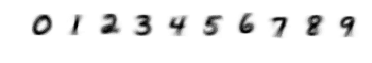

In [250]:
def P10(num_examples):

### STUDENT START ###
    # Create model, fit
    Bnb = BernoulliNB(alpha = .1, binarize=0.0)
    Bnb.fit(mini_train_data, mini_train_labels)
    # Generate estimated pixels and digits from model
    est_pixel_prob = np.exp(Bnb.feature_log_prob_)
    # Create 2 dim subplot array
    fig, axes = plt.subplots(1,10)
    print('Generated digits from complete mini training set:')
    for x in range(0, len(est_pixel_prob)):
        two_d = (np.reshape(est_pixel_prob[x], (28, 28)) * 255).astype(np.uint8)
                # Set approprirate subplot with black and white rendering
        axes[x].imshow(two_d, cmap='Greys', interpolation='nearest')
        axes[x].axis('off')
    # Show the plot and subplots
    plt.show()
### STUDENT END ###

P10(20)

ANSWER:  I was able to generate digits from the mini training set as shown above.  I don't understand the request for the 10x20 grid of multiple examples of each digit - the feature_log_prob_ appears to work on the entire model and only returns 10 values - one for each digit.  The digits I did generate are definitely blurrly compared to the training set, however the features are clear and you can definitely tell what each one is.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [240]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create model, fit, predictions
    Bnb = BernoulliNB(alpha = .1, binarize=0.0)
    Bnb.fit(mini_train_data, mini_train_labels)
    Bnb_predictions = Bnb.predict(dev_data)
    # Create posteriors
    Bnb_posterior = Bnb.predict_proba(dev_data)
    # Determine bucket index for each prediction/posterior
    for i in range(0, len(Bnb_predictions)):
        if (np.max(Bnb_posterior[i]) <= 0.5):
            bucket_index = 0
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.5 , np.max(Bnb_posterior[i]) <= 0.9)):
            bucket_index = 1
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.9 , np.max(Bnb_posterior[i]) <= 0.999)):
            bucket_index = 2
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.999 , np.max(Bnb_posterior[i]) <= 0.99999)):
            bucket_index = 3
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.99999 , np.max(Bnb_posterior[i]) <= 0.9999999)):
            bucket_index = 4
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.9999999 , np.max(Bnb_posterior[i]) <= 0.999999999)):
            bucket_index = 5
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.999999999 , np.max(Bnb_posterior[i]) <= 0.99999999999)):
            bucket_index = 6
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.99999999999 , np.max(Bnb_posterior[i]) <= 0.9999999999999)):
            bucket_index = 7
        elif (np.logical_and(np.max(Bnb_posterior[i]) > 0.9999999999999 , np.max(Bnb_posterior[i]) <= 1.0)):
            bucket_index = 8
        # Increment total for bucket
        total[bucket_index] += 1
        # If correct, increment correct tally for bucket
        if Bnb_predictions[i] == dev_labels[i]:
            correct[bucket_index] +=1
            
    # Return results
    return[buckets, correct, total]
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  71    accuracy = 0.493
p(pred) <= 0.9999900000000    total =  53    accuracy = 0.434
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.609
p(pred) <= 0.9999999990000    total =  46    accuracy = 0.543
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.808
p(pred) <= 0.9999999999999    total =  49    accuracy = 0.796
p(pred) <= 1.0000000000000    total = 632    accuracy = 0.951


ANSWER:  Accuracy increases as the posterior increases.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

Non binary opening examples:


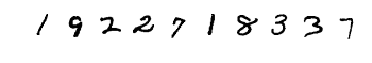

Modded (binary opening) examples:


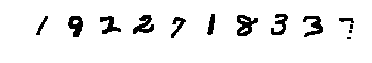

Results of Bernoulli Naive Bayes model with binary opening mods:
             precision    recall  f1-score   support

        0.0       0.87      0.97      0.92        99
        1.0       0.88      0.95      0.92       105
        2.0       0.81      0.77      0.79       102
        3.0       0.64      0.76      0.69        86
        4.0       0.91      0.77      0.83       104
        5.0       0.82      0.65      0.72        91
        6.0       0.88      0.89      0.88        98
        7.0       0.93      0.77      0.84       113
        8.0       0.71      0.77      0.74        96
        9.0       0.73      0.83      0.78       106

avg / total       0.82      0.81      0.82      1000



In [273]:
def P12():

### STUDENT START ###
    # Import scipy binary_opening
    from scipy.ndimage import binary_opening
    
    # Testing scipy mods on training data with display
    mod_train_data = np.array(mini_train_data)
    # Apply binary opening mod
    #   applies erosion and dilation to elimnate small objects
    # Reference:  http://www.scipy-lectures.org/advanced/image_processing/
    for train_digit in range (0, len(mod_train_data)):
        mod_train_data[train_digit] = binary_opening(mod_train_data[train_digit])
    print('Non binary opening examples:')
    fig, axes = plt.subplots(1,10)
    for i in range(0,10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(mini_train_data[i], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes[i].imshow(two_d, cmap='Greys', interpolation='nearest', label='Predicted')
        axes[i].axis('off')
    plt.show()
    # Disply modified examples:
    print('Modded (binary opening) examples:')
    fig2, axes2 = plt.subplots(1,10)
    for j in range(0,10):
        # Convert data vector to 2 dimensional matrix for rendering
        two_d = (np.reshape(mod_train_data[j], (28, 28)) * 255).astype(np.uint8)
        # Set approprirate subplot with black and white rendering
        axes2[j].imshow(two_d, cmap='Greys', interpolation='nearest', label='Predicted')
        axes2[j].axis('off')
    plt.show()
    
    # Create model, fit, and predict on modded mini training data
    print('Results of Bernoulli Naive Bayes model with binary opening mods:')
    nb = BernoulliNB(alpha = .1, binarize=0.0)
    nb.fit(mod_train_data, mini_train_labels)
    nb_predictions = nb.predict(dev_data)
    # Evaluate results
    print(classification_report(dev_labels, nb_predictions))
### STUDENT END ###

P12()